## Python Web Scraping Using BeautifulSoup

(https://www.dataquest.io/blog/web-scraping-tutorial-python/)

When performing data science tasks, it's common to want to use data found on the internet. You'll usually be able to access this data in csv format, or via an Application Programming Interface (API). However, there are times when the data you want can only be accessed as part of a web page. In cases like this, you'll want to use a technique called web scraping to get the data from the web page into a format you can work with in your analysis.

We'll be performing web scraping using the BeautifulSoup library.

#### The components of a web page

When we visit a web page, our web browser makes a request to a web server. This request is called a `GET` request, since we're getting files from the server. The server then sends back files that tell our browser how to render the page for us. The files fall into a few main types:

+ HTML — contain the main content of the page.
+ CSS — add styling to make the page look nicer.
+ JS — Javascript files add interactivity to web pages.
+ Images — image formats, such as JPG and PNG allow web pages to show pictures.

After our browser receives all the files, it renders the page and displays it to us. There's a lot that happens behind the scenes to render a page nicely, but we don't need to worry about most of it when we're web scraping. When we perform web scraping, we're interested in the main content of the web page, so we look at the HTML.

#### HTML

HyperText Markup Language (HTML) is a language that web pages are created in. HTML isn't a programming language, like Python — instead, it's a markup language that tells a browser how to layout content. HTML allows you to do similar things to what you do in a word processor like Microsoft Word — make text bold, create paragraphs, and so on. Because HTML isn't a programming language, it isn't nearly as complex as Python.


**A wonderful HTML tutorial: https://www.w3schools.com**

Let's take a quick tour through HTML so we know enough to scrape effectively. HTML consists of elements called tags. The most basic tag is the `<html>` tag. This tag tells the web browser that everything inside of it is HTML. We can make a simple HTML document just using this tag:

```
<html>
</html>
```
Right inside an `html` tag, we put two other tags, the `head` tag, and the `body` tag. The main content of the web page goes into the `body` tag. The `head` tag contains data about the title of the page, and other information that generally isn't useful in web scraping:
```
<html>
<head>
</head>
<body>
</body>
</html>
```
You may have noticed above that we put the `head` and `body` tags inside the `html` tag. In HTML, tags are nested, and can go inside other tags.

We'll now add our first content to the page, in the form of the `p` tag. The `p` tag defines a paragraph, and any text inside the tag is shown as a separate paragraph:

```
<html>
<head>
</head>
<body>
<p>
Here's a paragraph of text!
</p>
<p>
Here's a second paragraph of text!
</p>
</body>
</html>
```
Tags have commonly used names that depend on their position in relation to other tags:

+ child — a child is a tag inside another tag. So the two `p` tags above are both children of the `body` tag.
+ parent — a parent is the tag another tag is inside. Above, the `html` tag is the parent of the `body` tag.
+ sibiling — a sibiling is a tag that is nested inside the same parent as another tag. For example, `head` and `body` are siblings, since they're both inside `html`. Both `p` tags are siblings, since they're both inside `body`.

We can also add properties to HTML tags that change their behavior:
```
<html>
<head>
</head>
<body>
<p>
Here's a paragraph of text!
<a href="https://www.dataquest.io">Learn Data Science Online</a>
</p>
<p>
Here's a second paragraph of text!
<a href="https://www.python.org">Python</a> </p>
</body></html>
```
In the above example, we added two `a` tags. `a` tags are links, and tell the browser to render a link to another web page. The `href` property of the tag determines where the link goes.

`a` and `p` are extremely common html tags. Here are a few others:

+ div — indicates a division, or area, of the page.
+ b — bolds any text inside.
+ i — italicizes any text inside.
+ table — creates a table.
+ form — creates an input form.

For a full list of tags, look [here](https://developer.mozilla.org/en-US/docs/Web/HTML/Element).

Before we move into actual web scraping, let's learn about the class and id properties.

![img](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/refs/heads/main/pic/html_attributes.png)

These special properties give HTML elements names, and make them easier to interact with when we're scraping. One element can have multiple classes, and a class can be shared between elements. Each element can only have one id, and an id can only be used once on a page. Classes and ids are optional, and not all elements will have them.

We can add classes and ids to our example:
```
<html>
<head>
</head>
<body>
<p class="bold-paragraph">
Here's a paragraph of text!
<a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
</p>
<p class="bold-paragraph extra-large">
Here's a second paragraph of text!
<a href="https://www.python.org" class="extra-large">Python</a>
</p>
</body>
</html>
```
As you can see, adding classes and ids doesn't change how the tags are rendered at all.

#### The requests library

The first thing we'll need to do to scrape a web page is to download the page. We can download pages using the Python [requests library](https://2.python-requests.org//en/master/). The requests library will make a `GET` request to a web server, which will download the HTML contents of a given web page for us.

Let's try downloading a simple sample website, http://dataquestio.github.io/web-scraping-pages/simple.html. We'll need to first download it using the `requests.get` method.

In [ ]:
import requests
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
page

<Response [200]>

After running our request, we get a `Response` object. This object has a `status_code` property, which indicates if the page was downloaded successfully:

In [ ]:
page.status_code

200

A `status_code` of `200` means that the page downloaded successfully. We won't fully dive into status codes here, but a status code starting with a 2 generally indicates success, and a code starting with a 4 or a 5 indicates an error.

We can print out the HTML content of the page using the content property:

In [ ]:
page.content

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'

#### Parsing a page with BeautifulSoup

As you can see above, we now have downloaded an HTML document.

We can use the `BeautifulSoup` library to parse this document, and extract the text from the `p` tag. We first have to import the library, and create an instance of the `BeautifulSoup` class to parse our document:

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

We can now print out the HTML content of the page, formatted nicely, using the `prettify` method on the `BeautifulSoup` object:

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>



As all the tags are nested, we can move through the structure one level at a time. We can first select all the elements at the top level of the page using the `children` property of `soup`. Note that children returns a list generator, so we need to call the `list` function on it:

In [ ]:
list(soup.children)

['html',
 '\n',
 <html>
 <head>
 <title>A simple example page</title>
 </head>
 <body>
 <p>Here is some simple content for this page.</p>
 </body>
 </html>]

The above tells us that there are two tags at the top level of the page — the initial `<!DOCTYPE html>` tag, and the `<html>` tag. There is a newline character (`\n`) in the list as well. Let's see what the type of each element in the list is:

In [ ]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype, bs4.element.NavigableString, bs4.element.Tag]

As you can see, all of the items are `BeautifulSoup` objects. The first is a `Doctype` object, which contains information about the type of the document. The second is a `NavigableString`, which represents text found in the HTML document. The final item is a `Tag` object, which contains other nested tags. The most important object type, and the one we'll deal with most often, is the `Tag` object.

The `Tag` object allows us to navigate through an HTML document, and extract other tags and text. You can learn more about the various `BeautifulSoup` objects [here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#kinds-of-objects).

We can now select the `html` tag and its children by taking the third item in the list:

In [ ]:
html = list(soup.children)[2]

Each item in the list returned by the children property is also a `BeautifulSoup` object, so we can also call the `children` method on `html`.

Now, we can find the children inside the `html` tag:

In [ ]:
list(html.children)

['\n',
 <head>
 <title>A simple example page</title>
 </head>,
 '\n',
 <body>
 <p>Here is some simple content for this page.</p>
 </body>,
 '\n']

As you can see above, there are two tags here, `head`, and `body`. We want to extract the text inside the `p` tag, so we'll dive into the `body`:

In [ ]:
body = list(html.children)[3]

Now, we can get the `p` tag by finding the children of the `body` tag:

In [ ]:
list(body.children)

['\n', <p>Here is some simple content for this page.</p>, '\n']

We can now isolate the `p` tag:

In [ ]:
p = list(body.children)[1]

Once we've isolated the tag, we can use the `get_text` method to extract all of the text inside the tag:

In [ ]:
p.get_text()

'Here is some simple content for this page.'

#### Finding all instances of a tag at once

What we did above was useful for figuring out how to navigate a page, but it took a lot of commands to do something fairly simple. If we want to extract a single tag, we can instead use the `find_all` method, which will find all the instances of a tag on a page.

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
soup.find_all('p')

[<p>Here is some simple content for this page.</p>]

Note that `find_all` returns a list, so we’ll have to loop through, or use list indexing, it to extract text:

In [ ]:
soup.find_all('p')[0].get_text()

'Here is some simple content for this page.'

If you instead only want to find the first instance of a tag, you can use the `find` method, which will return a single `BeautifulSoup` object:

In [ ]:
soup.find('p')

<p>Here is some simple content for this page.</p>

#### Searching for tags by class and id

We introduced classes and ids earlier, but it probably wasn't clear why they were useful. Classes and ids are used by CSS to determine which HTML elements to apply certain styles to. We can also use them when scraping to specify specific elements we want to scrape. To illustrate this principle, we'll work with the following page:
```
<html>
<head>
<title>A simple example page</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
First paragraph.
</p>
<p class="inner-text">
Second paragraph.
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
First outer paragraph.
</b>
</p>
<p class="outer-text">
<b>
Second outer paragraph.
</b>
</p>
</body>
</html>
```

We can access the above document at the URL http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html. Let's first download the page and create a `BeautifulSoup` object:

In [ ]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
soup = BeautifulSoup(page.content, 'html.parser')
soup

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                First paragraph.
            </p>
<p class="inner-text">
                Second paragraph.
            </p>
</div>
<p class="outer-text first-item" id="second">
<b>
                First outer paragraph.
            </b>
</p>
<p class="outer-text">
<b>
                Second outer paragraph.
            </b>
</p>
</body>
</html>

Now, we can use the `find_all` method to search for items by `class` or by `id`. In the below example, we'll search for any `p` tag that has the class `outer-text`:

In [ ]:
soup.find_all('p', class_='outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

In the below example, we'll look for any tag that has the class `outer-text`:

In [ ]:
soup.find_all(class_="outer-text")

[<p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

We can also search for elements by `id`:

In [ ]:
soup.find_all(id="first")

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>]

#### Using CSS Selectors

You can also search for items using CSS selectors. These selectors are how the CSS language allows developers to specify HTML tags to style. Here are some examples:

+ `p a` — finds all `a` tags inside of a `p` tag.
+ `body p a` — finds all `a` tags inside of a `p` tag inside of a `body` tag.
+ `html body` — finds all `body` tags inside of an `html` tag.
+ `p.outer-text` — finds all `p` tags with a class of `outer-text`.
+ `p#first` — finds all `p` tags with an id of `first`.
+ `body p.outer-text` — finds any `p` tags with a class of `outer-text` inside of a `body` tag.

You can learn more about CSS selectors [here](https://developer.mozilla.org/en-US/docs/Learn/CSS/Building_blocks/Selectors).

`BeautifulSoup` objects support searching a page via CSS selectors using the `select` method. We can use CSS selectors to find all the `p` tags in our page that are inside of a `div` like this:

In [ ]:
soup.select("div p")

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>,
 <p class="inner-text">
                 Second paragraph.
             </p>]

Note that the `select` method above returns a list of `BeautifulSoup` objects, just like `find` and `find_all`.

# Let's get some texts from real site!

In [ ]:
import requests
from bs4 import BeautifulSoup

Searching for title

In [ ]:
page = requests.get("https://newsroom.wcs.org/News-Releases/articleType/ArticleView/articleId/25725/Charming-Video-Queens-Zoo-Shares-Playful-Moment-Between-Young-Andean-Bears.aspx")
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
titles = soup.find_all('h1')
titles

[<h1 class="Title text-center text-primary"><span class="TitleH2" id="dnn_ctr28242_dnnTITLE_titleLabel"><span class="fontFamily-2 text-bold">News Releases</span></span>
 </h1>,
 <h1>Charming Video: Queens Zoo Shares Playful Moment Between Young Andean Bears</h1>,
 <h1 class="type-caption align-center margin-2-bottom">
 <span class="TitleH2" id="dnn_ctr39126_dnnTITLE_titleLabel">Stand for Wildlife</span>
 </h1>]

In [ ]:
soup.find_all('div', class_ ='article-titles text-center')

[<div class="article-titles text-center">
 <h1>Charming Video: Queens Zoo Shares Playful Moment Between Young Andean Bears</h1>
 <h3 class="summary-item"><p style="text-align:center"><a href="https://www.dropbox.com/scl/fo/on2j3kwcrjk3dn6ho1ols/AEcWJdQuTb5SXIPWfQnX1DQ?dl=0&amp;e=1&amp;preview=Andean+Bears+at+Queens+Zoo.mp4&amp;rlkey=d3co6r6vhyhyexwws6ipqk9tc&amp;st=o3xqyia4" title="https://www.dropbox.com/scl/fo/on2j3kwcrjk3dn6ho1ols/AEcWJdQuTb5SXIPWfQnX1DQ?dl=0&amp;e=1&amp;preview=Andean+Bears+at+Queens+Zoo.mp4&amp;rlkey=d3co6r6vhyhyexwws6ipqk9tc&amp;st=o3xqyia4"><strong>Watch Video HERE</strong></a><br/>
 Credit: Queens Zoo/Ursula McDermott</p>
 </h3>
 <div class="location fontFamily-2 text-bold">
 <span class="place text-xxs text-uppercase">Queens </span>
 <span class="place text-xxs text-uppercase">, New York | </span>
 <span class="date text-xxs text-uppercase">December 11, 2025 </span>
 </div>
 </div>]

In [ ]:
div_title = soup.find_all('div', class_ ='article-titles text-center')[0]
div_title.find('h1').get_text()

'Charming Video: Queens Zoo Shares Playful Moment Between Young Andean Bears'

Searching for text

In [ ]:
text = ''
body = soup.find('div', class_='article-body')
body.get_text()

'\nQUEENS, NY, Dec. 11, 2025 — The Queens Zoo today released a short, heart-warming video featuring two young Andean bears playing with a tree branch.\nThe moment captured on video by a guest at the zoo, Ursula McDermott, shows the bears playing with a branch with a see-saw movement.\nThe pair includes Coya a female bear almost two years old, and Ransisku, a male almost four years old. Coya is on the right and Ransisku is on the left in the video.\n“As young bears, Coya and Ransisku are curious about everything in their environment,” said Mike Allen, Director of the Queens Zoo. “While this particular interaction with the branch is unique and fun to watch, it’s very much in line with their natural instinct to explore, climb, and test their surroundings. They’re learning about their habitat—and each other—every day.”\nAlso known as spectacled bears for the distinctive white or cream-colored markings around their eyes, Andean bears are the only bear species native to South America. Adults

Find date of publication

'December 11, 2025 '

### Let's find all latest news from the news pages

https://newsroom.wcs.org/News-Releases/currentpage/1.aspx

In [ ]:
url = 'https://newsroom.wcs.org/News-Releases/currentpage/1.aspx'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

Tags for titles and links to news

In [ ]:
titles = soup.find_all('a', class_ ='text-default text-xxl')
titles

[<a class="text-default text-xxl" href="https://newsroom.wcs.org/News-Releases/articleType/ArticleView/articleId/25725/Charming-Video-Queens-Zoo-Shares-Playful-Moment-Between-Young-Andean-Bears.aspx">Charming Video: Queens Zoo Shares Playful Moment Between Young Andean Bears</a>,
 <a class="text-default text-xxl" href="https://newsroom.wcs.org/News-Releases/articleType/ArticleView/articleId/25724/WCS-Honored-with-Ugandas-Visionaries-Award-for-Wildlife-Environmental-Conservation-Organization-of-the-Year.aspx">WCS Honored with Uganda’s Visionaries Award for “Wildlife Environmental Conservation Organization of the Year”</a>,
 <a class="text-default text-xxl" href="https://newsroom.wcs.org/News-Releases/articleType/ArticleView/articleId/25708/WCS-Statement-in-Tribute-to-Renowned-Elephant-Conservationist-Iain-Douglas-Hamilton.aspx">WCS Statement in Tribute to Renowned Elephant Conservationist Iain Douglas-Hamilton</a>,
 <a class="text-default text-xxl" href="https://newsroom.wcs.org/News-Re

Let's get links

In [ ]:
news_urls = []
for a in soup.find_all('a', {'class':"text-default text-xxl"}):
        news_urls.append(a['href'])
news_urls

['https://newsroom.wcs.org/News-Releases/articleType/ArticleView/articleId/25725/Charming-Video-Queens-Zoo-Shares-Playful-Moment-Between-Young-Andean-Bears.aspx',
 'https://newsroom.wcs.org/News-Releases/articleType/ArticleView/articleId/25724/WCS-Honored-with-Ugandas-Visionaries-Award-for-Wildlife-Environmental-Conservation-Organization-of-the-Year.aspx',
 'https://newsroom.wcs.org/News-Releases/articleType/ArticleView/articleId/25708/WCS-Statement-in-Tribute-to-Renowned-Elephant-Conservationist-Iain-Douglas-Hamilton.aspx',
 'https://newsroom.wcs.org/News-Releases/articleType/ArticleView/articleId/25693/Landmark-decisions-at-CITES-CoP20-deliver-historic-safeguards-for-sharks-and-rays-okapi-Galapagos-iguanas-geckos-sloths-and-other-speciesmany-threatened-by-the-global-pet-trade.aspx',
 'https://newsroom.wcs.org/News-Releases/articleType/ArticleView/articleId/25678/Governments-From-Around-the-World-Agree-to-Ban-Commercial-Trade-of-Galapagos-Iguanas.aspx',
 'https://newsroom.wcs.org/News

Now we can get news from all these links!
But let's get more links from other news pages.

In [ ]:
# Normal news page link looks like:
url_pattern = 'https://newsroom.wcs.org/News-Releases/currentpage/{}.aspx' # where {} for number

In [ ]:
# let's get links from these pages
for i in range(1, 5):
    print(url_pattern.format(i))

https://newsroom.wcs.org/News-Releases/currentpage/1.aspx
https://newsroom.wcs.org/News-Releases/currentpage/2.aspx
https://newsroom.wcs.org/News-Releases/currentpage/3.aspx
https://newsroom.wcs.org/News-Releases/currentpage/4.aspx


In [ ]:
news_urls = []
for i in range(1, 5):
    url = url_pattern.format(i)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    for a in soup.find_all('a', {'class':"text-default text-xxl"}):
        news_urls.append(a['href'])
len(news_urls)

40

We use the code written earlier (we take the headings and texts)

In [ ]:
from tqdm import tqdm

In [ ]:
news_info = []
for url in tqdm(news_urls):
    div_title = soup.find_all('div', class_ ='article-titles text-center')[0]
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    title = div_title.find('h1').get_text()
    date = soup.find('span', class_ ='date text-xxs text-uppercase').get_text()

    body = soup.find('div', class_='article-body')
    text = body.get_text()
    news_info.append([url, title, date, text])
len(news_info)

100%|██████████| 40/40 [00:10<00:00,  3.82it/s]


40

In [ ]:
news_info[5:7]

[['https://newsroom.wcs.org/News-Releases/articleType/ArticleView/articleId/25673/WCS-and-ICCN-Welcome-CITES-Decision-to-Prohibit-the-International-Trade-of-Endangered-Okapi.aspx',
  'Governments From Around the World Agree to Ban Commercial Trade of Galápagos Iguanas   ',
  'November 29, 2025 ',
  '\nSamarkand, Uzbekistan, Nov. 28, 2025—The Congolese Institute for Nature Conservation (ICCN) in partnership with the Wildlife Conservation Society (WCS) commends today’s decision by Parties to the Convention on International Trade in Endangered Species of Wild Fauna and Flora (CITES) to list the endangered okapi (Okapia johnstoni) on Appendix I.\nThis highest level of international protection will prohibit all international commercial trade in okapi or their parts, as well as sub-products. The species is already fully protected as an endemic species under national law in the Democratic Republic of the Congo (DRC), the only country where it is found.\n“The adoption of this Appendix I listin

Let's create a dataframe

In [ ]:
import pandas as pd
df = pd.DataFrame(data=news_info, columns = ['url', 'title', 'date', 'text'])
df

,url,title,date,text
0,https://newsroom.wcs.org/News-Releases/article...,Charming Video: Queens Zoo Shares Playful Mome...,"December 11, 2025","\nQUEENS, NY, Dec. 11, 2025 — The Queens Zoo t..."
1,https://newsroom.wcs.org/News-Releases/article...,Charming Video: Queens Zoo Shares Playful Mome...,"December 10, 2025","\nKampala, Uganda, December 10, 2025—The Wildl..."
2,https://newsroom.wcs.org/News-Releases/article...,WCS Honored with Uganda’s Visionaries Award fo...,"December 09, 2025","\nBronx, NY, December 9, 2025—The Wildlife Con..."
3,https://newsroom.wcs.org/News-Releases/article...,WCS Statement in Tribute to Renowned Elephant ...,"December 05, 2025","\nSamarkand, Uzbekistan, Dec. 5, 2025 – As the..."
4,https://newsroom.wcs.org/News-Releases/article...,Landmark decisions at CITES CoP20 deliver hist...,"December 03, 2025","\nSAMARKAND, Uzbekistan (December 3, 2025)—The..."
5,https://newsroom.wcs.org/News-Releases/article...,Governments From Around the World Agree to Ban...,"November 29, 2025","\nSamarkand, Uzbekistan, Nov. 28, 2025—The Con..."
6,https://newsroom.wcs.org/News-Releases/article...,WCS and ICCN Welcome CITES Decision to Prohibi...,"November 29, 2025","\nSamarkand, Uzbekistan, Nov. 28, 2025 – Parti..."
7,https://newsroom.wcs.org/News-Releases/article...,CITES CoP20 Decision Allows International Trad...,"November 28, 2025","\nSamarkand, Uzbekistan, Nov. 28, 2025 – The f..."
8,https://newsroom.wcs.org/News-Releases/article...,WCS Celebrates Historic and Sweeping Trade Pro...,"November 27, 2025","\nSamarkand, Uzbekistan, Nov. 27, 2025 – CITES..."
9,https://newsroom.wcs.org/News-Releases/article...,Historic Victory for Sharks as Oceanic Whiteti...,"November 27, 2025","\nSamarkand, Uzbekistan, 27 November 2025 – DN..."


# Wordcloud

In [ ]:
! pip install wordcloud

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# all news texts in one string
text_list = df['text'].to_list()
text = '\n'.join(text_list)
text = text.lower()
text[:400]

'\nqueens, ny, dec. 11, 2025 — the queens zoo today released a short, heart-warming video featuring two young andean bears playing with a tree branch.\nthe moment captured on video by a guest at the zoo, ursula mcdermott, shows the bears playing with a branch with a see-saw movement.\nthe pair includes coya a female bear almost two years old, and ransisku, a male almost four years old. coya is on the '

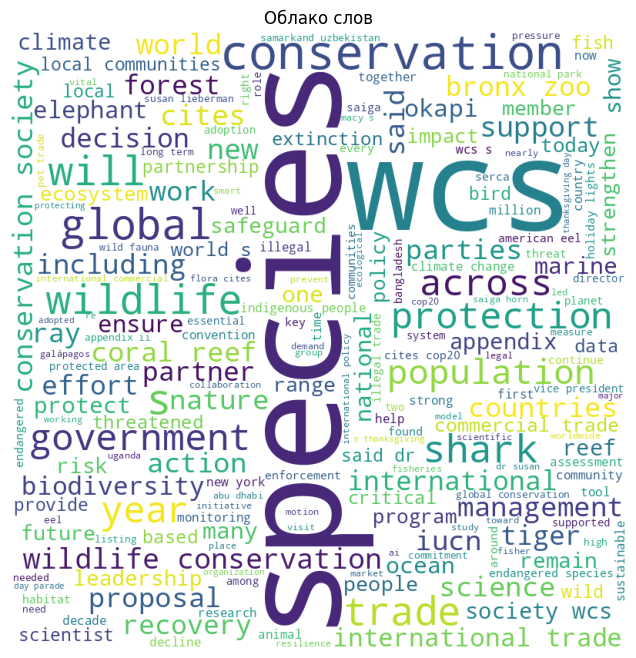

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=800).generate(text.lower())
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов')
plt.show()

### Lexical Dispersion Plot

In [ ]:
import nltk

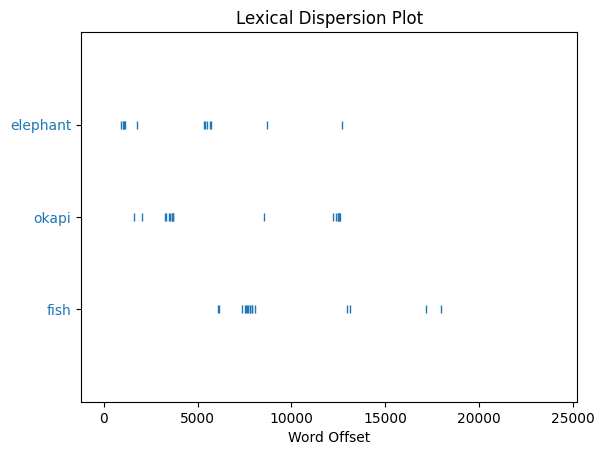

In [ ]:
from nltk.draw.dispersion import dispersion_plot
n = nltk.Text(text.split())
n.dispersion_plot(["elephant", "okapi", "fish"])